# Doc2Vec

**1. Add this notebook as a shortcut to your google drive directory and change the directory to your own (if needed)**

**2. Import python libraries**

*Caveat: The output may differ as the model training and random sample taken might be different each time it is run*

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

**We are using a random sample of 2000 records from our main dataset -** saved as "sample_size_doc2vec.xlsx" in the directory

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IS424 Depression Project/sample_size_doc2vec.xlsx")

data.dropna(inplace=True)
data.drop("index", axis=1, inplace=True)
data.reset_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       2000 non-null   int64 
 1   text        2000 non-null   object
 2   depression  2000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 47.0+ KB


In [ ]:
data.head()

,index,text,depression
0,0,ugly cow field concrete slather people live di...,1
1,1,finally stop talk finally end good pain joy go...,1
2,2,even fucked already insomnia another symptom d...,1
3,3,first mum year agothen pop still alive barely ...,1
4,4,motivate result happen happen start good good ...,0


In [ ]:
data["depression"].value_counts()

depression
1    1083
0     917
dtype: int64

**Install gensim on your machine**

In [ ]:
!pip install gensim

**Import the necessary modules**

In [ ]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec

**Tagging of all documents to prepare for Doc2Vec**


In [ ]:
tagged_data = [TaggedDocument(words=word_tokenize(text.lower()), tags=[str(i)]) for i, text in enumerate(data["text"])]

**Print out the tagged documents (Sentences + Tag ID)**

In [ ]:
tagged_data

[TaggedDocument(words=['ugly', 'cow', 'field', 'concrete', 'slather', 'people', 'live', 'dick', 'friend', 'hot', 'dry', 'sun', 'hurt', 'head', 'still', 'house', 'rent', 'yet', 'live', 'hotel', 'dog', 'die', 'cat', 'sick', 'pain', 'afford', 'surgery', 'partner', 'live', 'another', 'country', 'corona', 'mean', 'see', 'seriously', 'end', 'move', 'back', 'conservative', 'hick', 'redneck', 'hometown', 'scream'], tags=['0']),
 TaggedDocument(words=['finally', 'stop', 'talk', 'finally', 'end', 'good', 'pain', 'joy', 'good', 'memory', 'overcome', 'bad', 'right', 'person', 'wrong', 'thing', 'selfish', 'believe', 'mean', 'wish', 'best', 'even', 'sure', 'find', 'somebody', 'else', 'comfort', 'wish', 'best', 'hurt', 'imagine', 'love', 'understand', 'text', 'need', 'write', 'let', 'way', 'ache', 'everywhere', 'could', 'believe', 'stop', 'thinking', 'never', 'see', 'wish', 'love', 'much', 'miss', 'feeling', 'soul', 'intertwine', 'big', 'hope', 'happy', 'maybe', 'wrong', 'meet', 'next', 'goodbye', 'd

**Train the Doc2Vec Model**

In [ ]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2,epochs=80,workers=1)

In [ ]:
model.build_vocab(tagged_data)

In [ ]:
model.train(tagged_data, total_examples=model.corpus_count, epochs=80)

In [ ]:
model.save("d2v.model")

In [ ]:
model = Doc2Vec.load("d2v.model")

**Check for the most similar document to each document in the dataset, with the degree of similarity**

In [ ]:
for i in range(len(tagged_data)):
  similar_doc = model.docvecs.most_similar(i)
  print("Tagged Document " + str(i) + " is most similar to: " + str(similar_doc[0])) 

Tagged Document 0 is most similar to: ('1318', 0.6255472302436829)
Tagged Document 1 is most similar to: ('1996', 0.6258691549301147)
Tagged Document 2 is most similar to: ('1729', 0.7994747161865234)
Tagged Document 3 is most similar to: ('182', 0.6190629005432129)
Tagged Document 4 is most similar to: ('930', 0.8591060042381287)
Tagged Document 5 is most similar to: ('1248', 0.5766229033470154)
Tagged Document 6 is most similar to: ('909', 0.5627344846725464)
Tagged Document 7 is most similar to: ('984', 0.6442684531211853)
Tagged Document 8 is most similar to: ('703', 0.6126002073287964)
Tagged Document 9 is most similar to: ('1550', 0.9418865442276001)
Tagged Document 10 is most similar to: ('58', 0.6124101877212524)
Tagged Document 11 is most similar to: ('851', 0.6674759984016418)
Tagged Document 12 is most similar to: ('1563', 0.5866589546203613)
Tagged Document 13 is most similar to: ('14', 0.841745138168335)
Tagged Document 14 is most similar to: ('27', 0.9372344613075256)
Tag

**Assign Document Tags generated by Doc2Vec to the each corresponding record in the dataset**

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

doc_tags = list(model.docvecs.doctags.keys())
X = model[doc_tags]
print(model.docvecs.doctags)
print(doc_tags)

{'0': Doctag(offset=0, word_count=43, doc_count=1), '1': Doctag(offset=1, word_count=65, doc_count=1), '2': Doctag(offset=2, word_count=7, doc_count=1), '3': Doctag(offset=3, word_count=16, doc_count=1), '4': Doctag(offset=4, word_count=9, doc_count=1), '5': Doctag(offset=5, word_count=44, doc_count=1), '6': Doctag(offset=6, word_count=112, doc_count=1), '7': Doctag(offset=7, word_count=62, doc_count=1), '8': Doctag(offset=8, word_count=38, doc_count=1), '9': Doctag(offset=9, word_count=2, doc_count=1), '10': Doctag(offset=10, word_count=76, doc_count=1), '11': Doctag(offset=11, word_count=52, doc_count=1), '12': Doctag(offset=12, word_count=65, doc_count=1), '13': Doctag(offset=13, word_count=17, doc_count=1), '14': Doctag(offset=14, word_count=7, doc_count=1), '15': Doctag(offset=15, word_count=6, doc_count=1), '16': Doctag(offset=16, word_count=56, doc_count=1), '17': Doctag(offset=17, word_count=3, doc_count=1), '18': Doctag(offset=18, word_count=3, doc_count=1), '19': Doctag(offse

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

tagged_docs_tsne = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])

tagged_docs_tsne["text"] = list(data["text"])
tagged_docs_tsne["depression"] = list(data["depression"])
tagged_docs_tsne

,x,y,text,depression
0,4.574245,-18.749760,ugly cow field concrete slather people live di...,1
1,-26.055630,18.220539,finally stop talk finally end good pain joy go...,1
2,-10.717363,-14.707750,even fucked already insomnia another symptom d...,1
3,4.022994,1.621459,first mum year agothen pop still alive barely ...,1
4,-7.995779,1.517262,motivate result happen happen start good good ...,0
...,...,...,...,...
1995,-20.457470,12.280866,everyone tire sad decide turn around kill stop...,1
1996,-26.181999,18.284571,wish could read would give sit tonight tear ey...,1
1997,-3.992676,1.845041,found old photo today remind far come use anyone,0
1998,-23.642969,5.129250,constantly exhaust yet constantly awake night ...,1


**Visualisation - Scatter Plot of tweets grouped by presence/absence of depression**


---


Based on the scatter plot visualization below, we can tell that while most of the non-depressive tweets revolve around in a particular area on the vector space, depressive tweets are distributed evenly around the vector space with no inclination to any specific location/area.

However, depression is not that easy to identify and distinguish from the non-depressive comments we have as they are very much interconnected.
Some depressive comments may not necessarily sound very negative, hence, there is higher difficulty flagging these out as depressive.


In [ ]:
import plotly.express as px
tagged_docs_tsne["depression"] = tagged_docs_tsne["depression"].astype(str)
fig = px.scatter(tagged_docs_tsne, x="x", y="y", hover_data=["text"], color="depression")

fig.show()

# Topic Modelling with Doc2Vec

**Now, repeat the same process as above, except with the addition of Topic Keywords from the previous Topic Modelling analysis which are assigned to their corresponding documents**

In [ ]:
df_part_2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IS424 Depression Project/text_with_topic.xlsx")

df_part_2.dropna(inplace=True)
df_part_2.drop(columns=["Unnamed: 0"],inplace=True)
df_part_2.info()
df_part_2= df_part_2.sample(2000)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20347 entries, 0 to 20354
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Document_No         20347 non-null  int64  
 1   Dominant_Topic      20347 non-null  float64
 2   Topic_Perc_Contrib  20347 non-null  float64
 3   Keywords            20347 non-null  object 
 4   Text                20347 non-null  object 
 5   depression          20347 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.1+ MB


In [ ]:
tagged_data_2 = [TaggedDocument(words=word_tokenize(text.lower()), tags=[str(i)]) for i, text in enumerate(df_part_2["Text"])]

model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2,epochs=80,workers=1)

model.build_vocab(tagged_data_2)
model.train(tagged_data_2, total_examples=model.corpus_count, epochs=80)
model.save("d2v.model")
model = Doc2Vec.load("d2v.model")

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

doc_tags = list(model.docvecs.doctags.keys())
X = model[doc_tags]
print(model.docvecs.doctags)
print(doc_tags)

{'0': Doctag(offset=0, word_count=89, doc_count=1), '1': Doctag(offset=1, word_count=23, doc_count=1), '2': Doctag(offset=2, word_count=13, doc_count=1), '3': Doctag(offset=3, word_count=57, doc_count=1), '4': Doctag(offset=4, word_count=50, doc_count=1), '5': Doctag(offset=5, word_count=215, doc_count=1), '6': Doctag(offset=6, word_count=137, doc_count=1), '7': Doctag(offset=7, word_count=28, doc_count=1), '8': Doctag(offset=8, word_count=24, doc_count=1), '9': Doctag(offset=9, word_count=44, doc_count=1), '10': Doctag(offset=10, word_count=104, doc_count=1), '11': Doctag(offset=11, word_count=46, doc_count=1), '12': Doctag(offset=12, word_count=79, doc_count=1), '13': Doctag(offset=13, word_count=55, doc_count=1), '14': Doctag(offset=14, word_count=20, doc_count=1), '15': Doctag(offset=15, word_count=53, doc_count=1), '16': Doctag(offset=16, word_count=11, doc_count=1), '17': Doctag(offset=17, word_count=65, doc_count=1), '18': Doctag(offset=18, word_count=121, doc_count=1), '19': Do

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

tagged_docs_tsne_1 = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])

tagged_docs_tsne_1["text"] = list(df_part_2["Text"])
tagged_docs_tsne_1["depression"] = list(df_part_2["depression"])
tagged_docs_tsne_1["Keywords"] = list(df_part_2["Keywords"])
tagged_docs_tsne_1.head()

,x,y,text,depression,Keywords
0,-6.057585,13.735689,chest tired tire try hard anywhere today profe...,1,"depression, anxiety, therapy, therapist, year,..."
1,9.188098,8.998065,horrible choice likely traumatized people with...,1,"anymore, fuck, shit, fucking, tire, tired, sic..."
2,-5.096915,-5.295412,tire even valid reason always liminal space re...,1,"hate, thing, happy, good, find, enjoy, empty, ..."
3,0.681079,-2.192825,sit let long turn soon never education never e...,1,"issue, problem, lot, mental_health, state, sup..."
4,10.521185,-8.065829,depression andor anxiety fck badly change acce...,1,"live, good, year, point, end, reason, hard, fu..."


**Generate Main Topics based on Topic Keywords from Existing Topic Modelling Analysis**

In [ ]:
array_of_topic = []
key_words_topic = ['Behaviour','Experience','Living Situation','Emotional Well-being','Sleep patterns','Treatment (seek help)','Suicidal tendancies','Relationship',
                     'Social','Mental Health','Future','How one is being treated (Family)','Family','How one is being treated (Others)','Physical Appearance','Talking/Posting about their feelings','Past Attempts','Physical Well-being','Job-related issues','Beliefs']
for key, value in tagged_docs_tsne_1.groupby('Keywords'):
    print(key)
    array_of_topic.append(key)

anymore, fuck, shit, fucking, tire, tired, sick, literally, give, point
back, start, day, week, month, ago, felt, finally, today, past
call, leave, put, walk, house, back, room, dog, hit, place
cry, bad, sad, stop, talk, depress, happy, idk, depressed, problem
day, sleep, night, work, wake, hour, eat, bed, energy, morning
depression, anxiety, therapy, therapist, year, medication, med, bad, struggle, doctor
die, kill, pain, end, ill, stop, dead, alive, death, wait
friend, talk, relationship, year, close, meet, lot, lonely, girlfriend, start
hate, thing, happy, good, find, enjoy, empty, watch, waste, game
issue, problem, lot, mental_health, state, support, struggle, situation, experience, due
live, good, year, point, end, reason, hard, future, thing, change
love, hurt, leave, family, deserve, care, break, lose, good, person
parent, year, mom, school, family, dad, kid, mother, brother, father
people, bad, care, person, good, thing, hard, matter, understand, horrible
people, man, woman, fa

In [ ]:
tagged_docs_tsne_1.reset_index(inplace=True)

array_store_topic = []
print(len(array_of_topic))
print(len(tagged_docs_tsne_1))

for i in range (0,len(tagged_docs_tsne_1)):
    index = array_of_topic.index(tagged_docs_tsne_1['Keywords'][i])
    array_store_topic.append(key_words_topic[index])

tagged_docs_tsne_1['Topic'] = array_store_topic

tagged_docs_tsne_1.head()

20
2000


,index,x,y,text,depression,Keywords,Topic
0,0,-6.057585,13.735689,chest tired tire try hard anywhere today profe...,1,"depression, anxiety, therapy, therapist, year,...",Treatment (seek help)
1,1,9.188098,8.998065,horrible choice likely traumatized people with...,1,"anymore, fuck, shit, fucking, tire, tired, sic...",Behaviour
2,2,-5.096915,-5.295412,tire even valid reason always liminal space re...,1,"hate, thing, happy, good, find, enjoy, empty, ...",Social
3,3,0.681079,-2.192825,sit let long turn soon never education never e...,1,"issue, problem, lot, mental_health, state, sup...",Mental Health
4,4,10.521185,-8.065829,depression andor anxiety fck badly change acce...,1,"live, good, year, point, end, reason, hard, fu...",Future


**This shows the frequency of each Topic in this dataset of documents**

In [ ]:
tagged_docs_tsne_1["Topic"].value_counts()

Topic
Suicidal tendancies                     166
Treatment (seek help)                   139
Behaviour                               128
Family                                  126
Beliefs                                 123
Job-related issues                      110
Sleep patterns                          110
Emotional Well-being                    106
Past Attempts                           101
Relationship                             98
How one is being treated (Family)        97
Social                                   95
Talking/Posting about their feelings     88
Physical Well-being                      88
Future                                   82
How one is being treated (Others)        77
Living Situation                         72
Physical Appearance                      68
Experience                               66
Mental Health                            60
dtype: int64

In [ ]:
tagged_docs_tsne_1["depression"].value_counts()

depression
1    2000
dtype: int64

**Visualization - Scatter plot showing documents grouped based on the Topics assigned**

---

No unique pattern found as topics are distributed everywhere evenly and more insights are needed

In [ ]:
import plotly.express as px
fig = px.scatter(tagged_docs_tsne_1, x="x", y="y", hover_data=["text"], color="Topic")

fig.show()

# Doc2Vec with KMeans Clustering and Topic Modelling

### KMeans Clustering on Doc2Vec-generated tagged documents

In [ ]:
import pickle
import pandas as pd
import numpy
import re
import os
import numpy as np
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Doc2Vec

In [ ]:
cluster_prep = tagged_docs_tsne[tagged_docs_tsne['depression'] == '1']
cluster_prep.groupby('depression').count()

cluster_prep_x_y = cluster_prep[['x','y']]


**In order to choose the best K value, we plot SSE values where number of clusters is a range of 1 to 10. Subsequently, we plotted the SSE values on a line graph to select the best K value using the Elbow Method**

In [ ]:
sse = []
for i in range(1,10):
    model = KMeans(n_clusters = i, random_state=100)
    model.fit(cluster_prep_x_y)
    sse.append(model.inertia_)
    
sse = pd.Series(sse,index = range(1,10))
print(sse)

1    385208.750000
2    244465.378749
3    155863.089038
4    122843.852644
5    100176.424430
6     81132.687372
7     68938.195012
8     60807.032089
9     54201.839529
dtype: float64


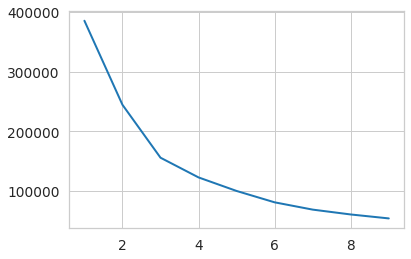

In [ ]:
plt.plot(sse.index, sse, linewidth=2.0)

**No. of Clusters Selected based on the Elbow Method: 
3**

In [ ]:
clusters_num = 3

**Applying KMeans Clustering model on our Tagged Documents generated by Doc2Vec**

In [ ]:
model = KMeans(n_clusters= clusters_num, random_state= 100)
model.fit(cluster_prep_x_y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [ ]:
cluster_prep['cluster'] = model.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def converter(label):
  label = int(label) + 1
  return str(label)

cluster_prep['cluster'] = cluster_prep['cluster'].apply(converter)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cluster_prep.head()

,x,y,text,depression,cluster
0,4.574245,-18.749760,ugly cow field concrete slather people live di...,1,1
1,-26.055630,18.220539,finally stop talk finally end good pain joy go...,1,2
2,-10.717363,-14.707750,even fucked already insomnia another symptom d...,1,1
3,4.022994,1.621459,first mum year agothen pop still alive barely ...,1,3
5,-19.235250,-5.802146,half finish project finish finish really album...,1,2


**3 Unique Clusters produced from KMeans Clustering on Doc2Vec Tagged Documents**

In [ ]:
import plotly.express as px
fig = px.scatter(cluster_prep, x="x", y="y", hover_data=["text"], color="cluster")

fig.show()

In [ ]:
cluster_df = cluster_prep

In [ ]:
cluster_1 = cluster_df[cluster_df['cluster'] == '1']
cluster_2 = cluster_df[cluster_df['cluster'] == '2']
cluster_3 = cluster_df[cluster_df['cluster'] == '3']

## Topic Modelling

Now, we are planning to implement Topic Modelling on top of the clusters that have been produced from KMeans Clustering on our Doc2Vec-generated tagged documents.

**Topic Modelling - Cluster 1**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



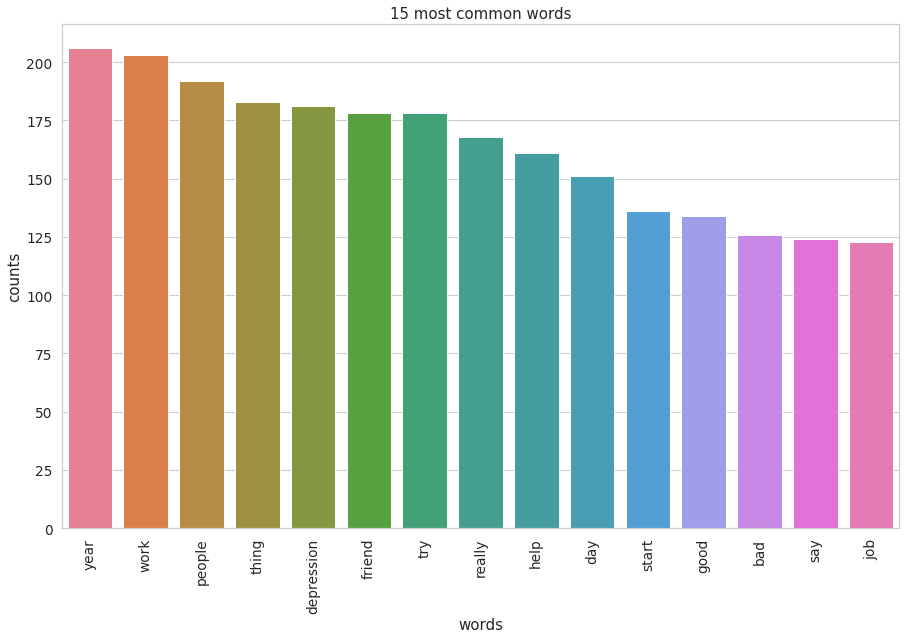

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='15 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(cluster_1['text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 1
number_words = 15

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics Found for Cluster 1:")
print_topics(lda, count_vectorizer, number_words)

Topics Found for Cluster 1:
year, work, people, thing, depression, friend, try, really, help, day, start, good, bad, say, job


**Topic Modelling - Cluster 2**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



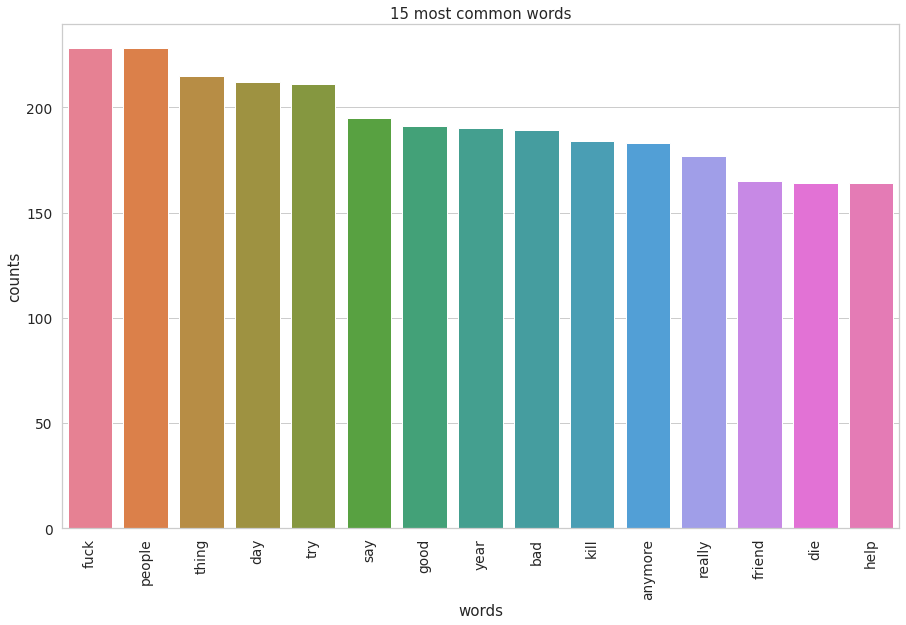

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='15 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(cluster_2['text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 1
number_words = 15

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics Found for Cluster 2:")
print_topics(lda, count_vectorizer, number_words)

Topics Found for Cluster 2:
fuck, people, thing, day, try, say, good, year, bad, kill, anymore, really, friend, die, help


**Topic Modelling - Cluster 3**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



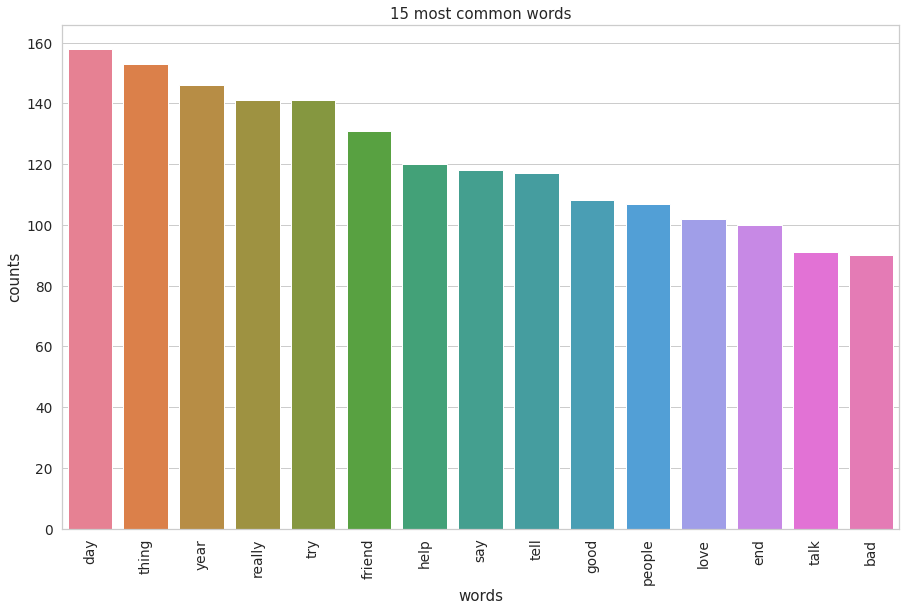

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='15 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(cluster_3['text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 1
number_words = 15

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics Found for Cluster 3:")
print_topics(lda, count_vectorizer, number_words)

Topics Found for Cluster 3:
day, thing, year, really, try, friend, help, say, tell, good, people, love, end, talk, bad


since there are some repeated words in all 3 topics, we will remove the common ones to see if we can get better and more reliable insights.

work, depression, start, job  - job-related stress

fuck, kill, anymore, die - Rumination/Suicidal Ideation

tell, love, end, talk - relationships

**We concluded the Topics for each cluster produced that we deem are the 3 main causes of depression based on our analysis:**

*   Cluster 1 : **Job-related Stress** 
*   Cluster 2 : **Rumination/Suicidal Ideation**
*   Cluster 3 : **Relationship**


